# Important Math Utilities for Principles of Planetary Climate

This *notebook* shows how the tasks previously accomplished by *ClimateUtilities.py* and *ClimateGraphicsMPL.py* can be done with *pandas* and *scipy*.

Compare this notebook to `old_ClimateUtilities\CoursewareGuide.ipynb`

In [1]:
import sys
sys.path.append(r'D:\Users\thomas\Coding\Python\climate\python3\utilities')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### DataFrames

`DataFrames` replace the `Curve` objects, as  an all-purpose data object  cooked up in order to make it easier to read, write, manipulate and plot tabular data.

In [3]:
df = pd.DataFrame()

Having created it, we can now put some data in it.

In [4]:
df['x'] = list(range(10))

You refer to a column of data using its name, and the name of the column is treated as an "index" into the data. Here's a simple example, also illustrating that what is returned by the indexing operation is an array that you can do array arithmetic on:

In [5]:
print(df['x'])
print(df['x']**2)

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
Name: x, dtype: int64
0     0
1     1
2     4
3     9
4    16
5    25
6    36
7    49
8    64
9    81
Name: x, dtype: int64


Now let's add a second data column, which we'll call `y`

In [6]:
yData = [2.*xx**2 for xx in range(10)]
df['y'] = yData

If you ever need to know what the names of the columns in a `DataFrame` object are, just use the property `columns`:

In [7]:
df.columns

Index(['x', 'y'], dtype='object')

You can do arithmetic on columns, and even store the results in a new named column, which will be created automatically:

In [8]:
df['y'] = df['y'] + 1.
df['z'] = 10.*df['x'] + df['y']
print(df['y'])
print(df['z'])

0      1.0
1      3.0
2      9.0
3     19.0
4     33.0
5     51.0
6     73.0
7     99.0
8    129.0
9    163.0
Name: y, dtype: float64
0      1.0
1     13.0
2     29.0
3     49.0
4     73.0
5    101.0
6    133.0
7    169.0
8    209.0
9    253.0
Name: z, dtype: float64


You can save your data to a tab-delimited text file using the `to_cvs(...)` method. (If you are new to *pandas*, also check out the other formats you can write to, by typing `df.to_+TAB`.)  The argument of the method is the filename:

In [9]:
df.to_csv('out.txt', sep='\t', index=False)

You can read tabular data into a `DataFrame` object using the `read_csv(...)` function. (Again, thera are many `pd.read_ ...` functions available.) Here we are reading our data back in again:

In [10]:
data = pd.read_csv('out.txt', sep='\t')
print(data)

   x      y      z
0  0    1.0    1.0
1  1    3.0   13.0
2  2    9.0   29.0
3  3   19.0   49.0
4  4   33.0   73.0
5  5   51.0  101.0
6  6   73.0  133.0
7  7   99.0  169.0
8  8  129.0  209.0
9  9  163.0  253.0


`read_csv` has a large number of options, which allow you to read in almost all kind of data.

You can make a new DataFrame object consisting of a subset of the original data:

In [11]:
df_subset = df[['x','z']]
print(df_subset)

   x      z
0  0    1.0
1  1   13.0
2  2   29.0
3  3   49.0
4  4   73.0
5  5  101.0
6  6  133.0
7  7  169.0
8  8  209.0
9  9  253.0


### Line plots with DataFrame objects

In [12]:
%matplotlib inline

And here is an example plotting the `DataFrame` `df` defined earlier

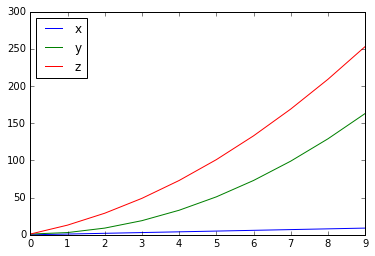

In [13]:
df.plot()

If you selecting  a given axis for the abscissa, the labels are automatically generated. Otherwise, you can use standard *matplotlib* to format the plot.

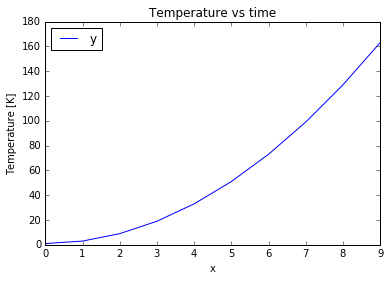

In [14]:
df.plot('x', 'y')
plt.title('Temperature vs time')
plt.ylabel('Temperature [K]')

You can reverse axes, use log-scales, etc

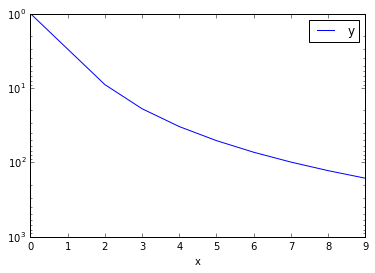

In [15]:
df.plot('x', 'y', logy=True)
ah = plt.gca()
ah.invert_yaxis()

You can plot multiple lines on the same graph: 

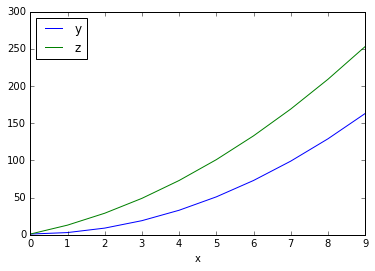

In [16]:
df.plot('x', ['y', 'z'])

### Numerical Analysis

#### Root finding by Newton's method

Here is an example of creating a root finder object for the problem $ x^2 - a = 0$.

In [17]:
from scipy.optimize import newton
def f(x):
    return x*x - 2
initial_guess = 1
m = newton(f, initial_guess)
print(m)

1.4142135623730947


Here's an example where the parameters of the function are passes as a list of two values

In [18]:
def f(x, n, a):
    return x**n - a
initial_guess = 1
m = newton(f, initial_guess, args=(3, 2)) #n=3,a=2
print(m)


1.25992104989478


#### Quadrature

Numerical quadrature is the process of evaluating a definite integral such as 

$$\int_a^b f(x) dx$$

There are many ways of numerically implementing quadrature. Trapezoidal rule is a simple one. The Romberg interpolation method gives a highly accurate approximation to a definite integral, if the function $f$ is reasonably smooth.  (It can behave poorly if the function has discontinuities).  Here is an example, where we evaluate the integral between $x=0$ and $x=1$:

In [19]:
from scipy.integrate import romberg
def f(x):
    return x
m = romberg(f, 0, 1)
print(m)

0.5


Here's an example of a function that needs parameters specified.

In [20]:
def f(x, g, n, tau):
    return np.exp(-g(x)**n/tau)
def g(x):
    return x**2
parameters = (g, 2, 2)
m = romberg(f, 0, 1, args=parameters)
print(m)

0.912427927687


In a case like this, where you might not need the function `g` again, you could use a `lambda` function as the parameter argument and save several lines. Here we are doing the integral for the case $g(x) = x\sin(x)$

In [22]:
m = romberg(f, 0, 1, args=(lambda x: x*np.sin(x),2.,2.))
print(m)

0.928827289952


#### Interpolation

There are several general interpolation facilities available in SciPy, for data in 1, 2, and higher dimensions:

* A class representing an interpolant (interp1d) in 1-D, offering several interpolation methods.
* Convenience function griddata offering a simple interface to interpolation in N dimensions (N = 1, 2, 3, 4, ...). Object-oriented interface for the underlying routines is also available.
* Functions for 1- and 2-dimensional (smoothed) cubic-spline interpolation, based on the FORTRAN library FITPACK. There are both procedural and object-oriented interfaces for the FITPACK library.
* Interpolation using Radial Basis Functions.

##### 1-D interpolation (interp1d)

The interp1d class in scipy.interpolate is a convenient method to create a function based on fixed data points which can be evaluated anywhere within the domain defined by the given data using linear interpolation. An instance of this class is created by passing the 1-d vectors comprising the data. The instance of this class defines a `__call__` method and can therefore by treated like a function which interpolates between known data values to obtain unknown values (it also has a docstring for help). Behavior at the boundary can be specified at instantiation time. The following example demonstrates its use, for linear and cubic spline interpolation:

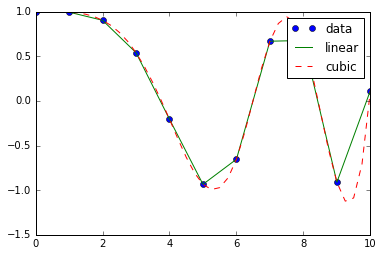

In [23]:
from scipy.interpolate import interp1d

# Generate some data
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
xnew = np.linspace(0, 10, num=41, endpoint=True)

# Make a "linear" and a "cubic" interpolation object
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

# Calculate and plot the interpolated data
plt.plot(x, y, 'o', label='data')
plt.plot(xnew, f(xnew), '-', label='linear')
plt.plot(xnew, f2(xnew),'--', label='cubic')
plt.legend()
plt.show()

#### Numerical integration of ordinary differential equations

Many tasks require a numerical integration of ordinary differential equations of the form 

$$ \frac{dY}{dt} = F(t,Y) $$

$Y$ is the dependent variable snd $t$ is the independent variable. In your own application, these might have different names.  This equation could represent a first order system in which the solution $Y(t)$ is just a real (or complex) valued function of $t$, but it could also represent a higher order system in which both $Y$ and the slope function $F$ are vectors (arrays). 

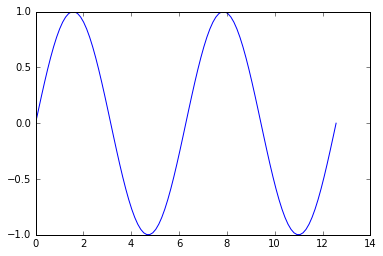

In [24]:
from scipy.integrate import odeint

def slope(x, t): #Function must have independent variable as an argument, even if not used
    return np.cos(t) 

yStart = 0
t = np.linspace(0, 4*np.pi, 101)
y = odeint(slope, yStart, t)
plt.plot(t,y)

Here's an example for a case where the slope function has parameters:

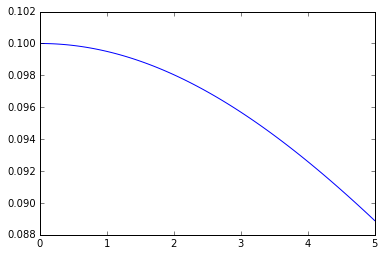

In [27]:
def slope(x, t, a, b):
    return -a* x**b * t

xStart = 0.1
t = np.linspace(0,5, 101)

a, b = 0.1, 2  # set the parameters
x = odeint(slope,xStart,t, args=(a,b))

plt.plot(t, x)

Now we'll illustrate how to integrate a higher order system. As our example we'll use the system

$$ \frac{dx}{dt} = - y , $\frac{dy}{dt} = x$$

which will be re-cast in the vector form

$$\frac{d}{dt} \left[ \begin{array}{c} x\\y \end{array} \right] = \left[ \begin{array}{c} -y\\x \end{array} \right] $$

Thus the slope function $F$ is the vector on the right hand side, and the "state variable" is the vector on the left hand side, which we'll call $S$. $F$ is a function of $S$.

Here is how we implement the solution. `integrator` is used exactly the same way. All we need to do is to write the slope function so that it takes a `numpy` array as input and produces a `numpy` array as output. Note that the array returned must be a *newly created* array . The initial value for the dependent variable given to `integrator` must also be a `numpy` array.

(-1, 1)

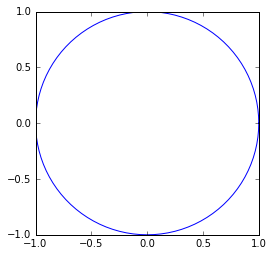

In [38]:
def F(S, t):
    x,y = S
    return np.array([-y,x])
S_start = np.array([1.,0.])
t = np.linspace(0, 2*np.pi, 101)
S = odeint(F, S_start,t)
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.plot(S[:,0], S[:,1])
ax.set_xlim(-1, 1)
ax.set_ylim(-1,1)

And here we are doing the integration and plotting the results in the x-y plane

Did you expect to see a circle? I hope so!